<a href="https://colab.research.google.com/github/akshithaa1/MarketTrendsAnalysis/blob/main/Analyze_Market_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load dataset**

In [ ]:
def load_data(file_path):
    """Loads the dataset for analysis."""
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# **Analyze market trends**

In [ ]:
def analyze_trends(data):
    """Analyzes market trends and competitor strategies."""
    trends = {
        'Top Categories by Revenue': data.groupby('Category')['Revenue'].sum().sort_values(ascending=False),
        'Top Competitors by Market Share': data.groupby('Competitor_Name')['Market_Share_%'].mean().sort_values(ascending=False),
        'Popular Marketing Strategies': data['Marketing_Strategy'].value_counts(),
        'Average Customer Ratings by Category': data.groupby('Category')['Customer_Rating'].mean()
    }
    return trends

# **Analyze customer purchasing factors**

In [ ]:
def analyze_factors(data):
    """Performs correlation analysis to identify purchasing factors."""
    return data[['Price', 'Units_Sold', 'Customer_Rating', 'Revenue']].corr()

# **Visualize insights**

In [ ]:
def visualize_insights(trends, correlation):
    """Generates visualizations for trends and purchasing factors."""
    sns.set(style="whitegrid")

    # Top Categories by Revenue
    trends['Top Categories by Revenue'].plot(kind='bar', title='Top Categories by Revenue', color='skyblue')
    plt.ylabel('Total Revenue')
    plt.show()

    # Top Competitors by Market Share
    trends['Top Competitors by Market Share'].head(10).plot(kind='bar', title='Top 10 Competitors by Market Share', color='orange')
    plt.ylabel('Market Share (%)')
    plt.show()

    # Popular Marketing Strategies
    trends['Popular Marketing Strategies'].plot(kind='pie', autopct='%1.1f%%', title='Popular Marketing Strategies', figsize=(6, 6))
    plt.ylabel('')
    plt.show()

    # Average Customer Ratings by Category
    trends['Average Customer Ratings by Category'].plot(kind='bar', title='Average Customer Ratings by Category', color='green')
    plt.ylabel('Average Rating')
    plt.show()

    # Correlation Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

# **Setup systematic data feed**

In [ ]:
def setup_data_feed(file_path, schedule):
    """Suggests ways to automate data updates."""
    print(f"To automate data updates, set up a scheduler (e.g., cron job) to refresh data from {file_path} every {schedule}.")

# **Main execution**


Top Categories by Revenue:
Category
Wall Art       1.793473e+08
Lighting       1.754387e+08
Textiles       1.714658e+08
Furniture      1.632293e+08
Kitchenware    1.588531e+08
Name: Revenue, dtype: float64

Top Competitors by Market Share:
Competitor_Name
Birch Lane          8.996709
Serena & Lily       8.866951
CB2                 8.605789
World Market        8.502838
Ashley Furniture    8.496477
Name: Market_Share_%, dtype: float64

Popular Marketing Strategies:
Marketing_Strategy
Free shipping            700
Eco-friendly products    676
Custom designs           673
Seasonal sales           663
Exclusive collections    662
Name: count, dtype: int64

Average Customer Ratings by Category:
Category
Decor Accessories    3.009375
Furniture            2.915845
Kitchenware          3.019085
Lighting             2.992319
Textiles             3.014815
Name: Customer_Rating, dtype: float64

Correlation Matrix:
                    Price  Units_Sold  Customer_Rating   Revenue
Price            1

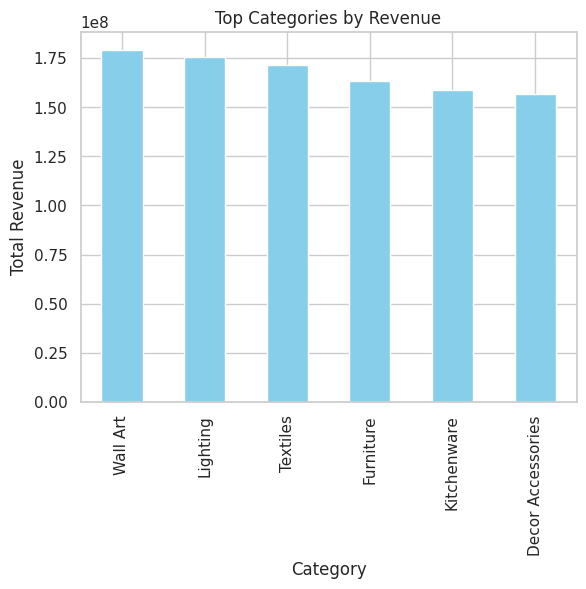

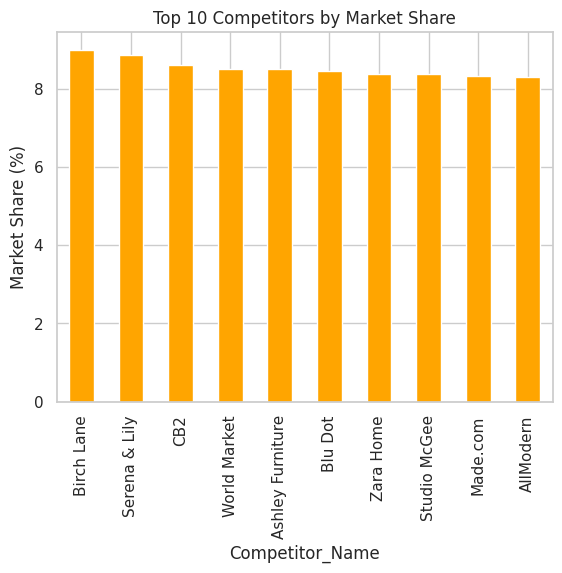

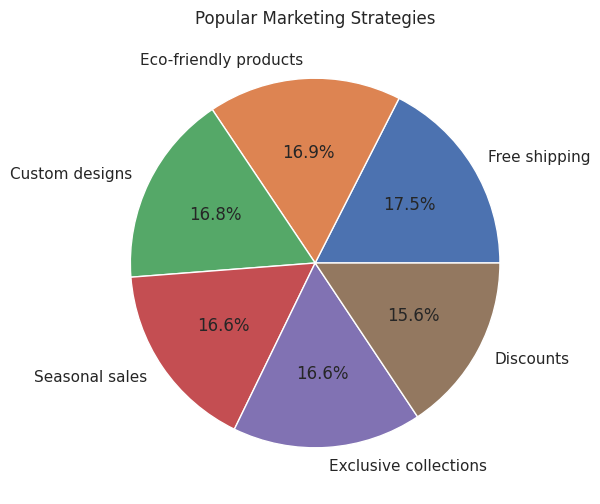

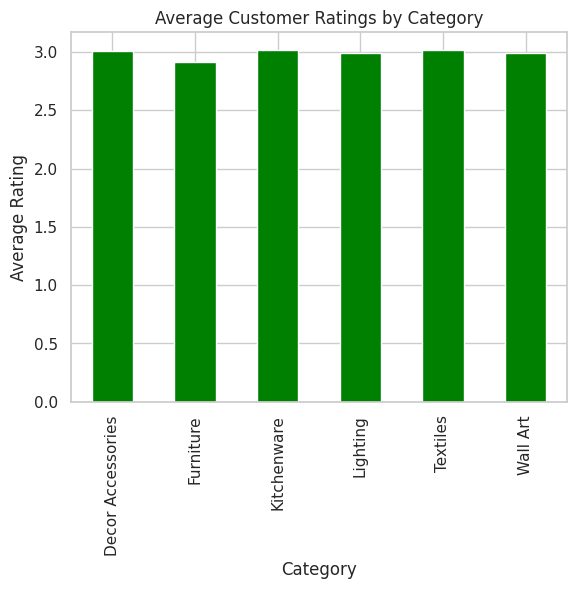

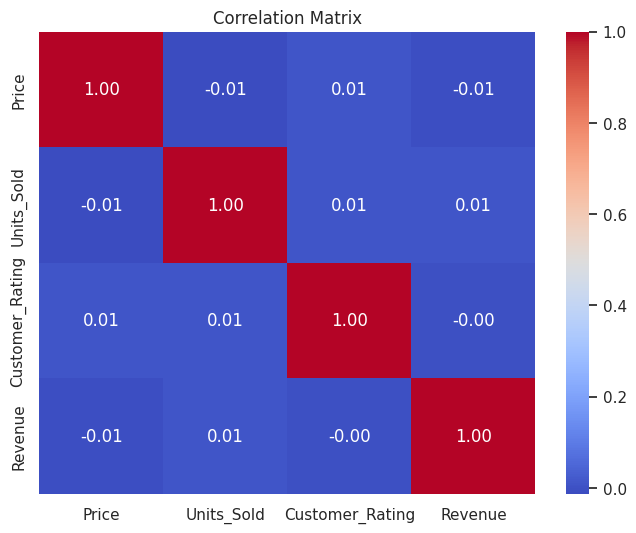

To automate data updates, set up a scheduler (e.g., cron job) to refresh data from /content/home_decor_market_trends.csv every daily.


In [ ]:
if __name__ == "__main__":
    file_path = '/content/home_decor_market_trends.csv'
    data = load_data(file_path)

    if data is not None:
        # Analyze trends and factors
        trends = analyze_trends(data)
        correlation = analyze_factors(data)

        # Display insights
        for key, value in trends.items():
            print(f"\n{key}:")
            print(value.head())

        print("\nCorrelation Matrix:")
        print(correlation)

        # Visualize insights
        visualize_insights(trends, correlation)

        # Setup systematic data feed
        setup_data_feed(file_path, 'daily')